In [1]:
import sys
from pathlib import Path
# Get the root directory of the project and add src to the Python path
project_root = Path().resolve().parent  # Adjust as needed to find the root directory
src_path = project_root / "src"
sys.path.append(str(src_path))

import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas_imports import transform_to_numerical

import torch
import torch.utils.data as data_utils
from torch import nn
from neural_network import NeuralNetwork
from training import train, test

#importing data and transforming
df = pd.read_csv("../data/heart_attack_risk_dataset.csv")
#print(data.head(4)) #print first 4 entries
dfN = transform_to_numerical(df)


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [24]:
#creating training and testing set


device = 'cpu'
train_ratio = 0.8 #how much of the data is used for training and how much for testing
batch_size=64

# Creating np arrays from dataframe
target = dfN['Heart_Attack_Risk'].values #save Heart_Attack_Risk as labels
features = dfN.drop('Heart_Attack_Risk', axis=1).values #remove the Heart_Attack_Risk because it is the label
#features = dfN.values #keeping the Heart_Attack_Risk should lead to 100% accuracy
features = (features-features.min(axis=0))/features.max(axis=0) #normalize to [0,1]
features = (features-features.mean(axis=0))/features.std(axis=0) #normalize to zero centered 1 standard deviation


#creating torch tensors from np.arrays
target = torch.from_numpy(target).long().to(device)
features = torch.from_numpy(features).float().to(device)

index_train = int(features.shape[0]*train_ratio)

# Passing to DataLoader
train_set = data_utils.TensorDataset(features[:index_train], target[:index_train])
train_loader = data_utils.DataLoader(train_set, batch_size=batch_size,shuffle=True)

test_set = data_utils.TensorDataset(features[index_train:], target[index_train:])
test_loader = data_utils.DataLoader(test_set, batch_size=batch_size,shuffle=True)

Epoch 1
-------------------------------
Test Error: 
 Accuracy: 50.2%, Avg loss: 1.029402 

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 50.2%, Avg loss: 1.031150 

Epoch 3
-------------------------------
Test Error: 
 Accuracy: 50.2%, Avg loss: 1.030183 

Epoch 4
-------------------------------
Test Error: 
 Accuracy: 50.2%, Avg loss: 1.032761 

Epoch 5
-------------------------------
Test Error: 
 Accuracy: 50.2%, Avg loss: 1.032761 

Epoch 6
-------------------------------
Test Error: 
 Accuracy: 50.2%, Avg loss: 1.034136 

Epoch 7
-------------------------------
Test Error: 
 Accuracy: 49.9%, Avg loss: 1.038865 

Epoch 8
-------------------------------
Test Error: 
 Accuracy: 49.8%, Avg loss: 1.036378 

Epoch 9
-------------------------------
Test Error: 
 Accuracy: 49.9%, Avg loss: 1.039093 

Epoch 10
-------------------------------
Test Error: 
 Accuracy: 49.6%, Avg loss: 1.044861 

Epoch 11
-------------------------------
Test Error: 
 Accuracy: 48.6%, Avg los

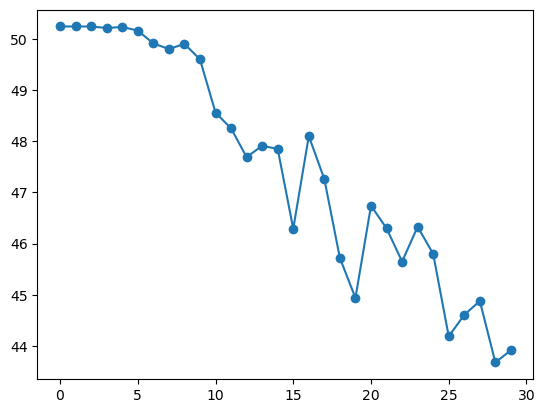

In [25]:
model = NeuralNetwork(neurons=[features.shape[1],100,3]).to(device)
epochs = 30

loss_fn = nn.CrossEntropyLoss()
#optimizer = torch.optim.SGD(model.parameters(), lr=0.003, momentum=0.6)
optimizer = torch.optim.AdamW(model.parameters(),lr=1e-3,weight_decay=1e-2)


accs=[];train_loss=[]; test_loss=[]
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_l = train(train_loader, model, loss_fn, optimizer)
    acc,test_l = test(test_loader, model, loss_fn)

    accs.append(acc); test_loss.append(test_l); train_loss.append(train_l)

plt.plot(accs,'-o')

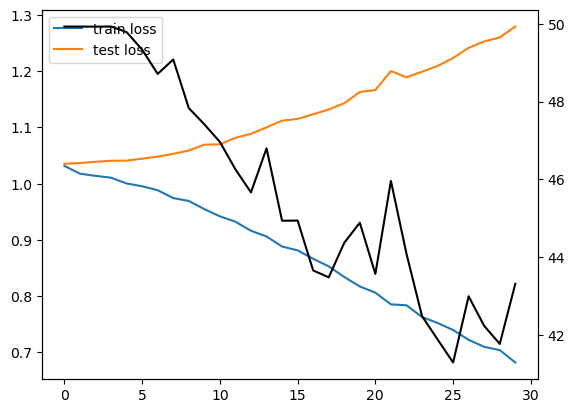

In [23]:
fig,ax = plt.subplots()

ax.plot(train_loss,'-',label='train loss')
ax.plot(test_loss,'-',label='test loss')
axR = ax.twinx()
axR.plot(accs,'k-')

ax.legend()

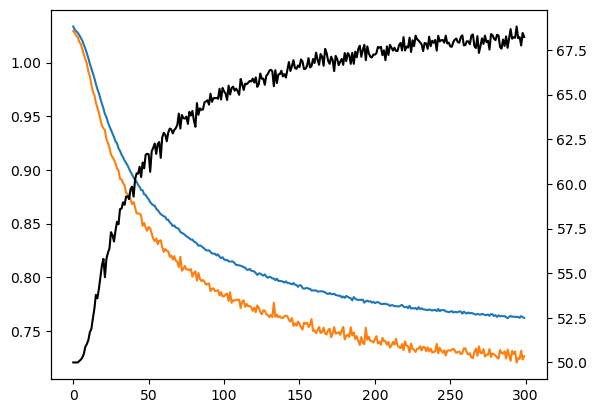

In [47]:
fig,ax = plt.subplots()

ax.plot(train_loss,'-')
ax.plot(test_loss,'-')
axR = ax.twinx()
axR.plot(accs,'k-')


In [45]:
torch.save(model.state_dict(), "../data/model_300epochs_accuracy_68.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


Parameter containing:
tensor([[ 2.8241e-01, -7.1794e-01,  4.1896e-01,  ...,  5.4405e-01,
         -6.1842e-01,  4.7558e-02],
        [-1.0268e-01, -7.1012e-04,  3.6187e-01,  ..., -3.9131e-01,
         -2.6537e-01,  1.6213e-03],
        [ 7.4236e-01, -6.4451e-01,  7.9619e-01,  ...,  6.8615e-01,
         -3.5445e-01,  1.0480e+00],
        ...,
        [-2.8617e-01,  2.3468e-01, -3.2720e-01,  ..., -1.4627e+00,
          3.0136e-01, -1.2903e-01],
        [ 7.4672e-01,  1.4655e-01,  2.6188e-01,  ...,  1.7932e-01,
         -3.1127e-01, -6.0670e-01],
        [ 1.0283e-01,  6.8443e-02, -1.6085e-01,  ..., -5.6357e-01,
          2.6022e-01,  5.0676e-02]], requires_grad=True)


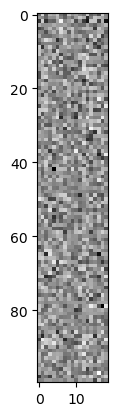

Parameter containing:
tensor([-0.0866, -0.4058, -1.0630, -0.1889,  0.1247, -0.1144, -0.3697,  0.0340,
        -0.5217, -0.4854,  0.1451, -0.1308,  0.4039, -0.1172, -0.1645,  0.1637,
        -0.1609, -0.3138, -0.3790, -0.2570,  0.1273, -0.2482, -0.0070,  0.2524,
         0.0591, -0.1865, -0.4196, -0.3560, -0.1196,  0.0775,  0.0284,  0.0894,
        -0.2491, -0.3085,  0.0033, -0.2680, -0.0920, -0.5267, -0.3294, -0.2400,
         0.2044, -0.3530, -0.2252, -0.0909,  0.2019, -0.0695, -0.3601, -0.3674,
        -0.0686, -0.4104, -0.2031, -0.0329, -0.2202, -0.2498, -0.3717, -0.2424,
        -0.4057,  0.2569, -0.5908, -0.0604,  0.0202, -0.2398, -0.1505, -0.0214,
        -0.1537, -0.4612,  0.2882, -0.4258,  0.0924, -0.0804,  0.1044, -0.4766,
         0.0286,  0.3576, -0.3002,  0.2586, -0.7774, -0.1815,  0.0601, -0.2219,
        -0.1368, -0.0833, -0.0559,  0.0128, -0.3016, -0.1973,  0.0613, -0.0463,
         0.2117, -0.0190,  0.1802, -0.1519,  0.0472,  0.2207,  0.1511,  0.0550,
         0.1595,  

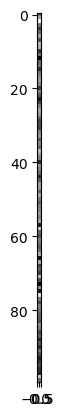

Parameter containing:
tensor([[ 0.0821,  0.0562, -0.0105,  ..., -0.0304,  0.0026, -0.0010],
        [-0.0049,  0.0386,  0.1809,  ...,  0.2309,  0.1071,  0.2614],
        [-0.1797,  0.3182, -0.6527,  ..., -0.3422,  0.2397, -0.2340],
        ...,
        [-0.2340, -0.1158, -0.1483,  ..., -0.2192, -0.0137,  0.1516],
        [ 0.1041, -0.1288, -0.2157,  ...,  0.0222, -0.0229,  0.1576],
        [-0.1741, -0.0251, -0.4434,  ..., -0.1368, -0.0218, -0.0670]],
       requires_grad=True)


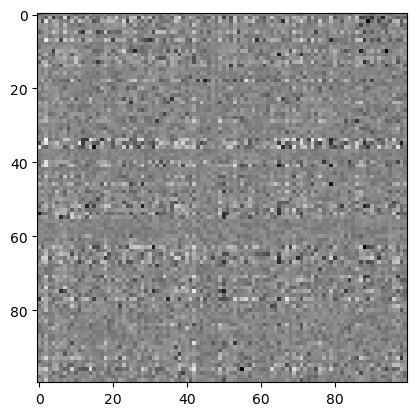

Parameter containing:
tensor([-0.2646, -0.6341, -0.3995, -0.4203, -0.1041, -0.3155, -0.2043, -0.5272,
        -0.2058, -0.1916, -0.9395, -0.6417, -0.4687, -0.4960, -0.5415, -0.1472,
        -0.2556, -0.1654, -0.4817, -0.1787, -0.5255, -0.1994, -0.2369, -0.3400,
        -0.3154, -0.3369, -0.4193, -0.3013, -0.3448, -0.2634, -0.1593, -0.1574,
        -0.3566, -0.2712,  0.0516, -0.4538, -0.6797, -0.1220, -0.1027, -0.1109,
        -0.6339, -0.5976, -0.1068, -0.2909, -0.2798, -0.1267, -0.7104, -0.2590,
        -0.6695, -0.4428, -0.3075, -0.4352, -0.5806, -0.6285, -0.4179, -0.2238,
        -0.1642, -0.3206, -0.1295, -0.2230, -0.2320, -0.3391, -0.2229, -0.5919,
        -0.3829, -0.8916, -0.8260, -0.8020, -0.4069, -0.3700, -0.1676, -0.2570,
        -0.2085, -0.4885, -0.4207, -0.8790, -0.2308, -0.4928, -0.3674, -0.6197,
        -0.4743, -0.2139, -0.2974, -0.2715, -0.5917, -0.1429, -0.4056, -0.2998,
        -0.0278, -0.8414, -0.1799, -0.2910, -0.0564, -0.0473, -0.2858, -0.3445,
        -0.2331, -

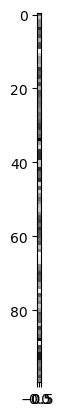

Parameter containing:
tensor([[ 4.4132e-02, -3.6330e-01, -3.6689e-01,  2.4198e-01,  8.5776e-02,
          3.8402e-01,  1.7273e-01, -2.0977e-01,  4.2300e-02,  4.0207e-02,
          2.9630e-01,  2.2841e-01, -1.0460e-01,  2.8121e-01, -4.7054e-02,
         -7.9420e-02, -7.9929e-02, -4.4050e-02, -4.3052e-01,  2.4769e-02,
          1.5974e-01,  4.5000e-03,  8.3798e-02,  2.2273e-01,  7.3402e-02,
          1.5940e-01,  1.6137e-01,  1.7332e-01, -1.3524e-01,  2.5053e-01,
         -3.9308e-02,  1.3750e-01, -1.9551e-01,  1.9822e-01,  1.7137e-01,
         -4.2244e-01,  2.2988e-01,  3.7686e-02,  3.2328e-02, -3.8482e-02,
          3.7823e-01,  5.1469e-01,  2.2098e-02, -1.3570e-01, -1.3489e-01,
         -1.5767e-02,  4.1450e-01, -7.4817e-02, -6.7207e-02,  5.0606e-02,
          5.7551e-02,  4.0686e-02,  1.8823e-01, -2.0474e-01, -2.0360e-01,
          8.6166e-02,  3.8544e-02,  8.0965e-02, -6.0533e-02,  1.8629e-03,
          3.0577e-01,  7.8166e-02,  7.2016e-02,  5.5402e-01,  2.9945e-01,
          3.3507

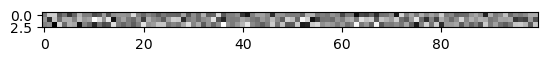

Parameter containing:
tensor([ 0.3646, -0.4953, -0.0674], requires_grad=True)


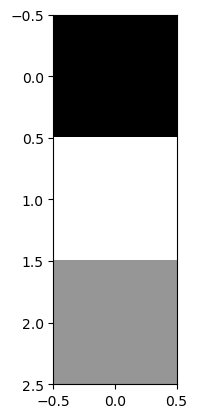

In [123]:
import matplotlib.pyplot as plt

for param in model.parameters():
    print(param)
    arr = param.data.detach().numpy()
    if len(arr.shape)==2:
        plt.imshow(arr,cmap='Greys')
        plt.show()
    else:
        plt.imshow(np.reshape(arr,(len(arr),1)),cmap='Greys')
        plt.show()
    

In [54]:
#learning rate scheduler but this is not really helping

from torch.optim.lr_scheduler import OneCycleLR
scheduler = OneCycleLR(optimizer,
    max_lr=1e-2,         # Peak learning rate
    total_steps=epochs*int(index_train/batch_size),    # Total number of steps (epochs * batches_per_epoch)
    anneal_strategy="cos",  # Use cosine annealing
    div_factor=25,       # Initial LR = max_lr / div_factor
    final_div_factor=100,# Final LR = max_lr / final_div_factor
)

tensor([ 0.6015, -0.3205, -0.1659])